In [181]:
import numpy as np
import pandas as pd

In [182]:
datasetproduct_url = "../data-collection-preprocessing/data-produk/clean_product-goodgamingshop.csv"
datasetreview_url = "../data-collection-preprocessing/data-ulasan-clean/clean_data-ulasan-goodgamingstore.csv"

In [183]:
dfori_product = pd.read_csv(datasetproduct_url)
dfori_review = pd.read_csv(datasetreview_url)

In [184]:
df_product = dfori_product.copy()
df_review = dfori_review.copy()

In [185]:
df_review.head()

,id_produk,nama_produk,review,id_user,nama_akun,rating_user,ulasan_produk,waktu_review,varian_produk
0,PI2563,Pulsar X2 MINI RandomFrankP Edition WIreless G...,1,UI0001,Bimo,5,Nyaman dan praktis tinggal plug and play,Lebih dari 1 tahun lalu,none
1,PI2564,Melgeek Mojo68 Retro - Mechanical Keyboard,1,UI0002,S***m,5,"Keren memang mojo68 retro, sayang typing sound...",9 bulan lalu,Varian: Gat Silver Pro
2,PI2567,Redragon K608 Full size Mechanical - Gaming Ke...,1,UI0003,Riski,5,"buat yg nyari suara pas ngetik, bisa beli yg s...",Lebih dari 1 tahun lalu,Varian: Brown Switch
3,PI2569,CORSAIR MM300 EXTENDED GAMING MOUSEPAD SPEED,1,UI0004,S***o,5,"rapih, material bagus, nyaman digunakan, dimen...",Lebih dari 1 tahun lalu,none
4,PI2573,ZOOM75 Essential Edition Strawberry IceCream B...,1,UI0005,Winardi,5,Kedua kali beli Zoom75 disini and never dissap...,3 bulan lalu,none


In [186]:
df_review.dtypes

id_produk        object
nama_produk      object
review            int64
id_user          object
nama_akun        object
rating_user       int64
ulasan_produk    object
waktu_review     object
varian_produk    object
dtype: object

In [187]:
df_review = df_review.drop('review', axis=1)

In [188]:
# Mengonversi setiap nilai dalam kolom menjadi string
df_review['id_produk'] = df_review['id_produk'].apply(str)
df_review['nama_produk'] = df_review['nama_produk'].apply(str)
df_review['id_user'] = df_review['id_user'].apply(str)
df_review['nama_akun'] = df_review['nama_akun'].apply(str)
df_review['rating_user'] = df_review['rating_user'].apply(int)
df_review['ulasan_produk'] = df_review['ulasan_produk'].apply(str)
df_review['waktu_review'] = df_review['waktu_review'].apply(str)
df_review['varian_produk'] = df_review['varian_produk'].apply(str)

In [189]:
df_review.dtypes

id_produk        object
nama_produk      object
id_user          object
nama_akun        object
rating_user       int64
ulasan_produk    object
waktu_review     object
varian_produk    object
dtype: object

In [190]:
df_review.isnull().sum()

id_produk        0
nama_produk      0
id_user          0
nama_akun        0
rating_user      0
ulasan_produk    0
waktu_review     0
varian_produk    0
dtype: int64

In [191]:
df_product.dtypes

id_produk           object
nama_produk         object
kategori_produk     object
jumlah_terjual       int64
harga_jual           int64
harga_awal           int64
diskon             float64
deskripsi           object
rating             float64
rating_counter       int64
link                object
image_path          object
dtype: object

In [192]:
df_product['kategori_produk'].head(3)

0    Home|Komputer & Laptop|Aksesoris PC Gaming|Gam...
1    Home|Komputer & Laptop|Aksesoris PC Gaming|Gam...
2    Home|Komputer & Laptop|Aksesoris Komputer & La...
Name: kategori_produk, dtype: object

In [193]:
new_cat = df_product['kategori_produk'].str.split('|', expand=True)
new_cat

,0,1,2,3
0,Home,Komputer & Laptop,Aksesoris PC Gaming,Game Capture Card & Stream Deck
1,Home,Komputer & Laptop,Aksesoris PC Gaming,Game Capture Card & Stream Deck
2,Home,Komputer & Laptop,Aksesoris Komputer & Laptop,Keyboard
3,Home,Komputer & Laptop,Aksesoris Komputer & Laptop,Keypad
4,Home,Perlengkapan Pesta,Bungkus Kemasan,Bubble Wrap
...,...,...,...,...
2608,Home,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming
2609,Home,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming
2610,Home,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming
2611,Home,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming


In [194]:
new_cat['category_1'] = new_cat[1]
new_cat['category_2'] = new_cat[2]
new_cat['category_3'] = new_cat[3]

In [195]:
df_product.drop('kategori_produk', axis=1, inplace=True)
df_product['kategori_1'] = new_cat['category_1']
df_product['kategori_2'] = new_cat['category_2']
df_product['kategori_3'] = new_cat['category_3']

In [196]:
df_product['kategori_1'].value_counts()

kategori_1
Komputer & Laptop                                                                 2401
Audio, Kamera & Elektronik Lainnya                                                  81
Film & Musik                                                                        42
Gaming                                                                              33
Handphone & Tablet                                                                  13
Pertukangan                                                                          9
Rumah Tangga                                                                         8
Elektronik                                                                           6
Perlengkapan Pesta                                                                   4
Olahraga                                                                             4
Fashion Pria                                                                         4
Mainan & Hobi                   

In [197]:
df_product['kategori_1'] = df_product['kategori_1'].replace({
    'BenQ EW3270U 4K Video Enjoyment Monitor with Eye-care Technology 32" - EW3270U': 'Komputer & Laptop',
    'LG 27GK750F - Gaming Monitor': 'Komputer & Laptop',
    'MSi Optix MAG341CQ - Gaming Monitor': 'Komputer & Laptop'
})

In [198]:
df_product['kategori_1'].value_counts()

kategori_1
Komputer & Laptop                     2404
Audio, Kamera & Elektronik Lainnya      81
Film & Musik                            42
Gaming                                  33
Handphone & Tablet                      13
Pertukangan                              9
Rumah Tangga                             8
Elektronik                               6
Perlengkapan Pesta                       4
Olahraga                                 4
Fashion Pria                             4
Mainan & Hobi                            3
Office & Stationery                      1
Dapur                                    1
Name: count, dtype: int64

In [199]:
df_product['kategori_2'].value_counts()

kategori_2
Aksesoris PC Gaming                                                               1881
Aksesoris Komputer & Laptop                                                        295
Monitor                                                                            157
Audio                                                                               74
Vokal                                                                               37
Komponen Komputer                                                                   24
Kabel & Adaptor                                                                     21
Aksesoris Mobile Gaming                                                             20
PC & Laptop Gaming                                                                  13
Aksesoris Handphone                                                                 12
Furniture                                                                            8
Aksesoris Game Console          

In [200]:
mapping_kategori = {
    'MSi Optix MAG341CQ - Gaming Monitor': 'Monitor',
    'LG 27GK750F - Gaming Monitor': 'Monitor',
    'BenQ EW3270U 4K Video Enjoyment Monitor with Eye-care Technology 32" - EW3270U': 'Monitor'
}

df_product['kategori_2'] = df_product['kategori_2'].map(mapping_kategori).fillna(df_product['kategori_2'])

In [201]:
df_product['kategori_2'].value_counts()

kategori_2
Aksesoris PC Gaming             1881
Aksesoris Komputer & Laptop      295
Monitor                          160
Audio                             74
Vokal                             37
Komponen Komputer                 24
Kabel & Adaptor                   21
Aksesoris Mobile Gaming           20
PC & Laptop Gaming                13
Aksesoris Handphone               12
Furniture                          8
Aksesoris Game Console             6
Game Console                       6
TV & Aksesoris                     6
Hand Tools                         5
Keyboard & Piano                   4
Atasan Pria                        4
Networking                         4
Bungkus Kemasan                    4
Lighting & Studio                  4
Aksesoris Olahraga                 3
Media Penyimpanan Data             3
Proyektor & Aksesoris              2
Material Bangunan                  2
Document Organizer                 1
Bekal                              1
Aksesoris Kamera           

In [202]:
df_product['kategori_3'].value_counts()

kategori_3
Keyboard Gaming                    462
Mouse Gaming                       336
Headset Gaming                     333
Game Capture Card & Stream Deck    247
Kursi Gaming                       192
                                  ... 
Microphone Kamera                    1
SSD                                  1
Holder Handphone                     1
CD PC dan Laptop Gaming              1
Action Figure                        1
Name: count, Length: 99, dtype: int64

In [203]:
produk_ke_kategori = {
    'LG 27GK750F - Gaming Monitor': 'Gaming Monitor',
    'MSi Optix MAG341CQ - Gaming Monitor': 'Gaming Monitor',
    'BenQ EW3270U 4K Video Enjoyment Monitor with Eye-care Technology 32" - EW3270U': 'Monitor'
}

df_product['kategori_2'] = df_product['kategori_2'].map(produk_ke_kategori).fillna(df_product['kategori_2'])

In [204]:
df_product['kategori_3'].value_counts()

kategori_3
Keyboard Gaming                    462
Mouse Gaming                       336
Headset Gaming                     333
Game Capture Card & Stream Deck    247
Kursi Gaming                       192
                                  ... 
Microphone Kamera                    1
SSD                                  1
Holder Handphone                     1
CD PC dan Laptop Gaming              1
Action Figure                        1
Name: count, Length: 99, dtype: int64

In [205]:
df_product.isna().sum()

id_produk         0
nama_produk       0
jumlah_terjual    0
harga_jual        0
harga_awal        0
diskon            0
deskripsi         0
rating            0
rating_counter    0
link              0
image_path        0
kategori_1        0
kategori_2        0
kategori_3        0
dtype: int64

In [206]:
df_product.sample(5)

,id_produk,nama_produk,jumlah_terjual,harga_jual,harga_awal,diskon,deskripsi,rating,rating_counter,link,image_path,kategori_1,kategori_2,kategori_3
877,PI0878,Press Play Type C YC8 Aviator Keyboard Cable D...,6,399000,399000,0.00,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,1,https://www.tokopedia.com/goodgamingshop/press...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Kabel & Adaptor,Kabel USB
635,PI0636,Epos GSX 300 / GSX300 Snow EDITION - External ...,12,1099000,1460000,0.25,JAM OPERASIONAL\r\nSenin - Minggu : 10:00 - 19...,5.0,5,https://www.tokopedia.com/goodgamingshop/epos-...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Komponen Komputer,Sound Card
773,PI0774,Fantech WH03 GO Air Bluetooth 5.0 Wireless Hea...,8,299000,299000,0.00,JAM OPERASIONAL\r\nSenin - Minggu : 10:00 - 19...,5.0,2,https://www.tokopedia.com/goodgamingshop/fante...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Headset Gaming
347,PI0348,VGN Dragonfly 4K smart Speed Wireless Dongle,30,199000,199000,0.00,JAM OPERASIONAL\r\nSenin - Minggu : 10:00 - 19...,4.9,19,https://www.tokopedia.com/goodgamingshop/vgn-d...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Networking,Adapter
1052,PI1053,Pulsar Low Profile US ANSI - PBT Doubleshot - ...,4,349000,349000,0.00,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,4,https://www.tokopedia.com/goodgamingshop/pulsa...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming


In [207]:
# Filter produk dengan rating 0 tetapi rating_counter tidak nol
reviews_zero_rating = df_product[(df_product['rating'] == 0) & (df_product['rating_counter'] != 0)]

# Tampilkan dalam bentuk tabel
print(reviews_zero_rating)

     id_produk                                        nama_produk  \
187     PI0188                    Digital Alliance MyCam - Webcam   
197     PI0198  Keychron Q1 QMK BAREBONE - DIY KIT Gaming Keyb...   
267     PI0268                    dbE C100 Full HD 1080P - Webcam   
515     PI0516  Leopold FC660M Yellow Blue White Mechanical Ga...   
612     PI0613    Digital Alliance Delta Armor X - Gaming Headset   
674     PI0675      Premium Garskin G403 Skin Mouse - Supreme R&W   
748     PI0749      GALAX Gaming Chair GC-01 - RGB Effect - Hitam   
1078    PI1079                         Elgato Wave Extension Rods   
2439    PI2440       Corsair MM200 Pro Heavy XL - Gaming Mousepad   

      jumlah_terjual  harga_jual  harga_awal  diskon  \
187               70      299000      299000    0.00   
197               60     2900000     2900000    0.00   
267               40      375000      375000    0.00   
515               17     1045000     1480000    0.29   
612               13      499

In [208]:
rows_to_show = ['PI0188', 'PI0198', 'PI0268', 'PI0516', 'PI0613', 'PI0675', 'PI0749', 'PI1079', 'PI2440']

# Filter baris berdasarkan ID produk yang disebutkan dan pilih hanya kolom 'link'
df_product.loc[df_product['id_produk'].isin(rows_to_show)]

,id_produk,nama_produk,jumlah_terjual,harga_jual,harga_awal,diskon,deskripsi,rating,rating_counter,link,image_path,kategori_1,kategori_2,kategori_3
187,PI0188,Digital Alliance MyCam - Webcam,70,299000,299000,0.00,Deskripsi Digital Alliance MyCam - Webcam\r\nW...,0.0,44,https://www.tokopedia.com/goodgamingshop/digit...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris Komputer & Laptop,Webcam
197,PI0198,Keychron Q1 QMK BAREBONE - DIY KIT Gaming Keyb...,60,2900000,2900000,0.00,Garansi Resmi Distributor (WAJIB MENYERTAKAN B...,0.0,48,https://www.tokopedia.com/goodgamingshop/keych...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming
267,PI0268,dbE C100 Full HD 1080P - Webcam,40,375000,375000,0.00,Fitur Utama :\r\n- Gambar jernih dengan kualit...,0.0,23,https://www.tokopedia.com/goodgamingshop/dbe-c...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris Komputer & Laptop,Webcam
515,PI0516,Leopold FC660M Yellow Blue White Mechanical Ga...,17,1045000,1480000,0.29,Garansi Resmi Distributor Terkait 1 Tahun\r\n\...,0.0,12,https://www.tokopedia.com/goodgamingshop/leopo...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming
612,PI0613,Digital Alliance Delta Armor X - Gaming Headset,13,499000,499000,0.00,Deskripsi Digital Alliance Delta Armor X - Gam...,0.0,6,https://www.tokopedia.com/goodgamingshop/digit...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Headset Gaming
674,PI0675,Premium Garskin G403 Skin Mouse - Supreme R&W,11,49999,49999,0.00,Pastikan Anda Sudah Memilih Variant Motif Yang...,0.0,7,https://www.tokopedia.com/goodgamingshop/premi...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris Komputer & Laptop,Lainnya
748,PI0749,GALAX Gaming Chair GC-01 - RGB Effect - Hitam,9,3532000,3532000,0.00,Angle : 90-180degree\r\nBack Width 53 cm\r\nSe...,0.0,7,https://www.tokopedia.com/goodgamingshop/galax...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Kursi Gaming
1078,PI1079,Elgato Wave Extension Rods,4,200000,200000,0.00,Deskripsi Elgato Wave Extension Rods\r\n\r\nVA...,0.0,3,https://www.tokopedia.com/goodgamingshop/elgat...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris Komputer & Laptop,Lainnya
2439,PI2440,Corsair MM200 Pro Heavy XL - Gaming Mousepad,19,419000,419000,0.00,Game in confidence on the CORSAIR MM200 PRO Pr...,0.0,12,https://www.tokopedia.com/goodgamingshop/corsa...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Mouse Pad Gaming


In [209]:
df_product.loc[df_product['id_produk'] == 'PI0188', 'rating'] = 4.9
df_product.loc[df_product['id_produk'] == 'PI0198', 'rating'] = 5.0
df_product.loc[df_product['id_produk'] == 'PI0268', 'rating'] = 4.9
df_product.loc[df_product['id_produk'] == 'PI0516', 'rating'] = 4.9
df_product.loc[df_product['id_produk'] == 'PI0613', 'rating'] = 4.3
df_product.loc[df_product['id_produk'] == 'PI0675', 'rating'] = 4.1
df_product.loc[df_product['id_produk'] == 'PI0749', 'rating'] = 4.7
df_product.loc[df_product['id_produk'] == 'PI1079', 'rating'] = 4.3
df_product.loc[df_product['id_produk'] == 'PI2440', 'rating'] = 4.9

EDA

In [210]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_theme(style='darkgrid')
sns.set_palette("deep")
mpl.rcParams['font.family'] = 'sans'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

In [211]:
df_product.describe(include='object')

,id_produk,nama_produk,deskripsi,link,image_path,kategori_1,kategori_2,kategori_3
count,2613,2613,2613,2613,2613,2613,2613,2613
unique,2613,2613,2562,2613,2613,14,39,99
top,PI0001,"AKKO CS SWITCH MECHANICAL KEYBOARD - ROSE RED,...",#ERROR!,https://www.tokopedia.com/goodgamingshop/akko-...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming
freq,1,1,7,1,1,2404,1881,462


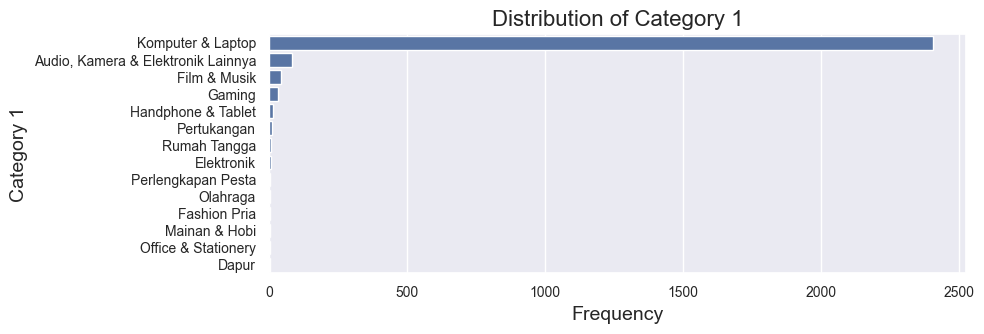

In [212]:
plt.figure(figsize=(10, 3.5))
sns.countplot(data=df_product, y='kategori_1', order=df_product['kategori_1'].value_counts().index)
plt.title('Distribution of Category 1')
plt.xlabel('Frequency')
plt.ylabel('Category 1')
plt.tight_layout()
plt.show()

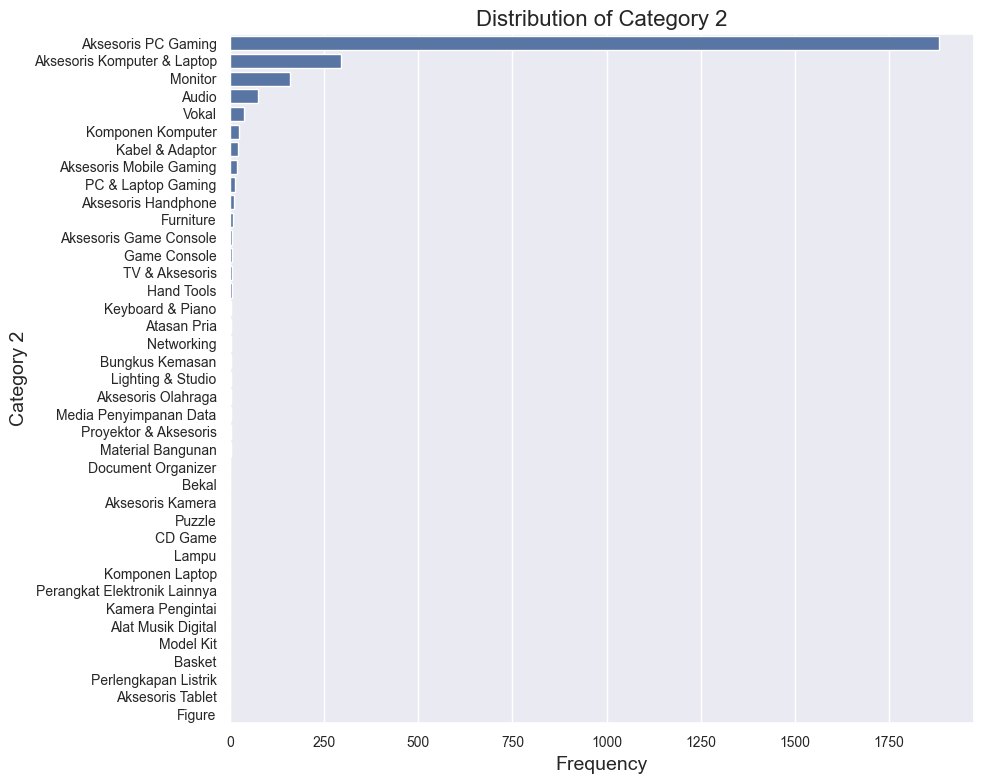

In [213]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_product, y='kategori_2', order=df_product['kategori_2'].value_counts().index)
plt.title('Distribution of Category 2')
plt.xlabel('Frequency')
plt.ylabel('Category 2')
plt.tight_layout()
plt.show()

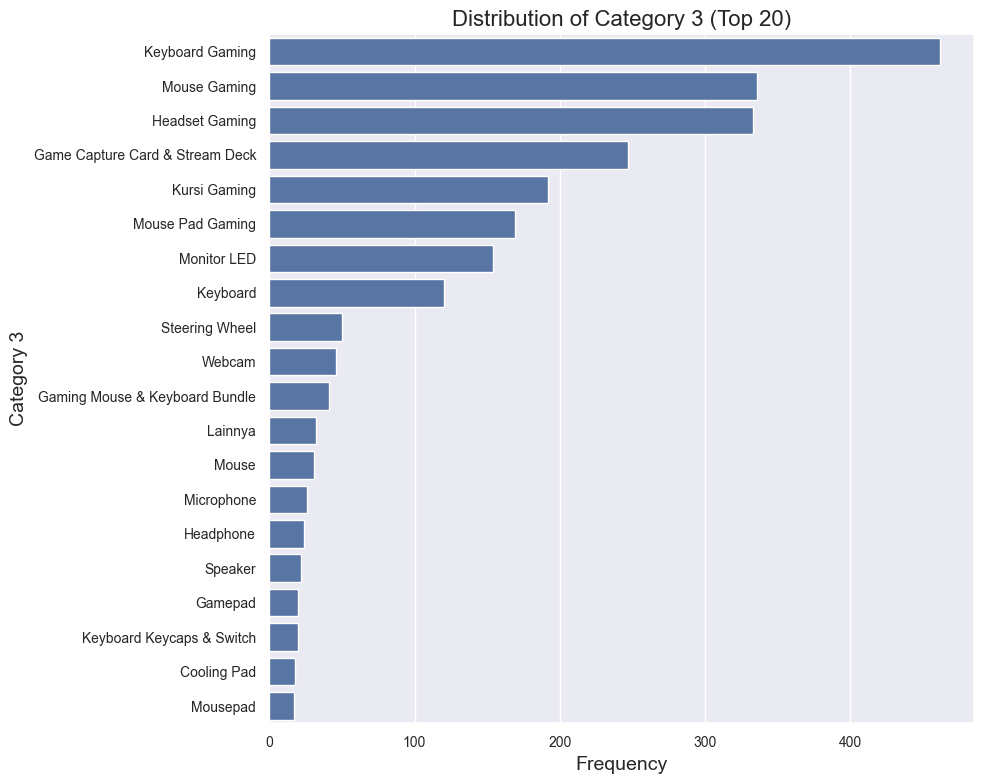

In [214]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_product, y='kategori_3', order=df_product['kategori_3'].value_counts().head(20).index)
plt.title('Distribution of Category 3 (Top 20)')
plt.xlabel('Frequency')
plt.ylabel('Category 3')
plt.tight_layout()
plt.show()


In [215]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_produk       2613 non-null   object 
 1   nama_produk     2613 non-null   object 
 2   jumlah_terjual  2613 non-null   int64  
 3   harga_jual      2613 non-null   int64  
 4   harga_awal      2613 non-null   int64  
 5   diskon          2613 non-null   float64
 6   deskripsi       2613 non-null   object 
 7   rating          2613 non-null   float64
 8   rating_counter  2613 non-null   int64  
 9   link            2613 non-null   object 
 10  image_path      2613 non-null   object 
 11  kategori_1      2613 non-null   object 
 12  kategori_2      2613 non-null   object 
 13  kategori_3      2613 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 285.9+ KB


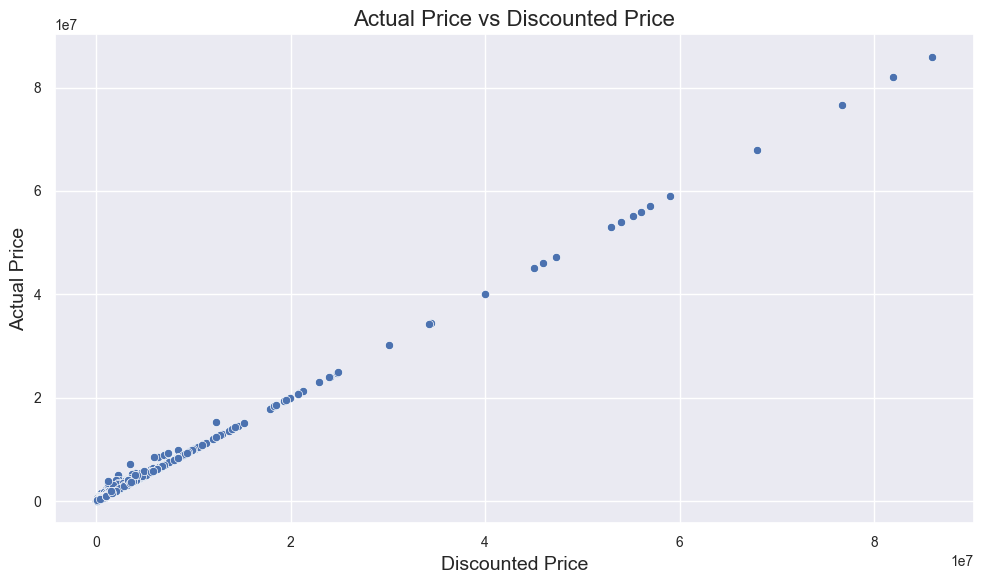

In [216]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_product, x='harga_jual', y='harga_awal')
plt.title('Actual Price vs Discounted Price')
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.tight_layout()
plt.show()

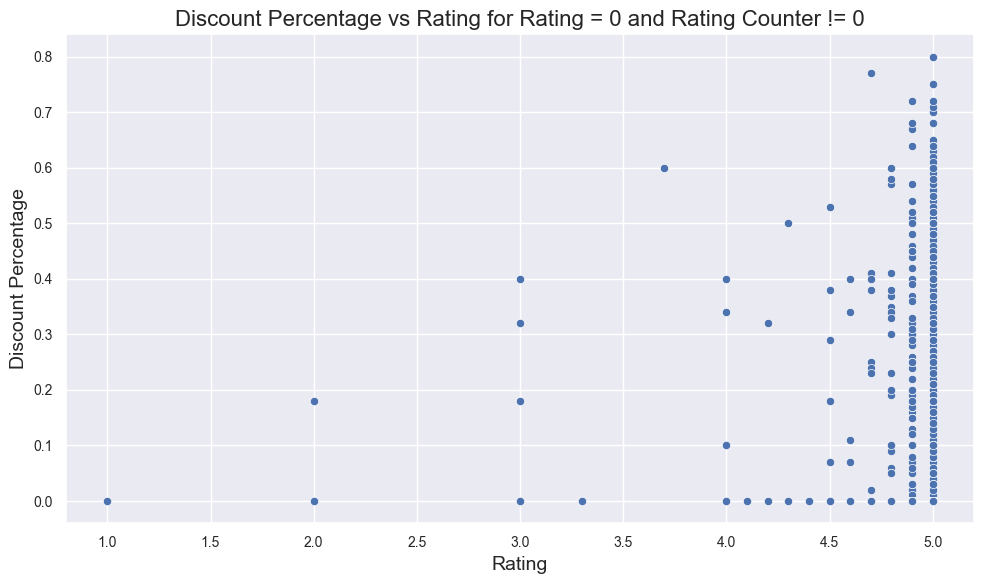

In [217]:
# Filter the data
filtered_df = df_product[(df_product['rating'] >= 0) & (df_product['rating_counter'] != 0)]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='rating', y='diskon')
plt.title('Discount Percentage vs Rating for Rating = 0 and Rating Counter != 0')
plt.xlabel('Rating')
plt.ylabel('Discount Percentage')
plt.tight_layout()
plt.show()

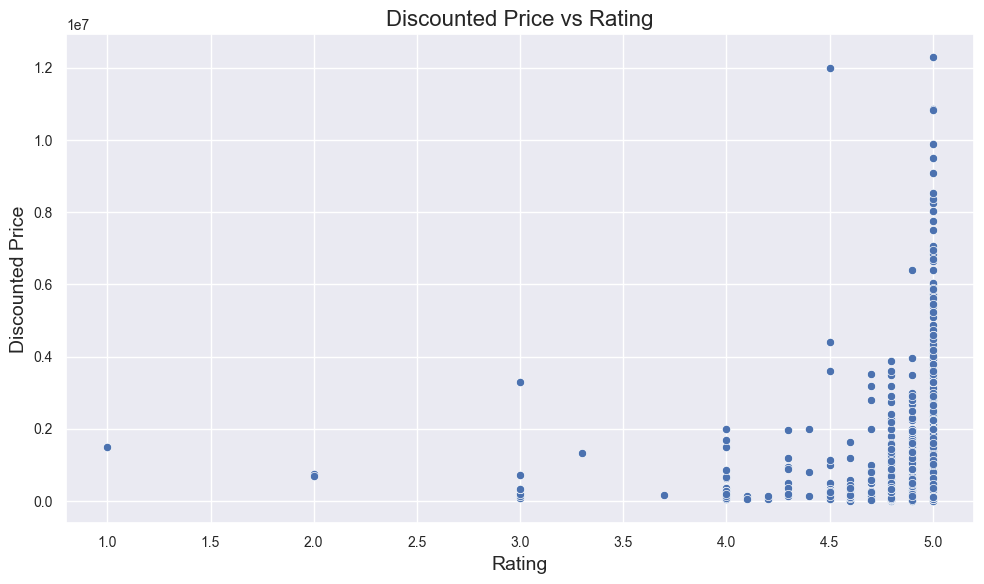

In [218]:
# Filter the data
filtered_df = df_product[(df_product['rating'] >= 0) & (df_product['rating_counter'] != 0)]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='rating', y='harga_jual')
plt.title('Discounted Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Discounted Price')
plt.tight_layout()
plt.show()

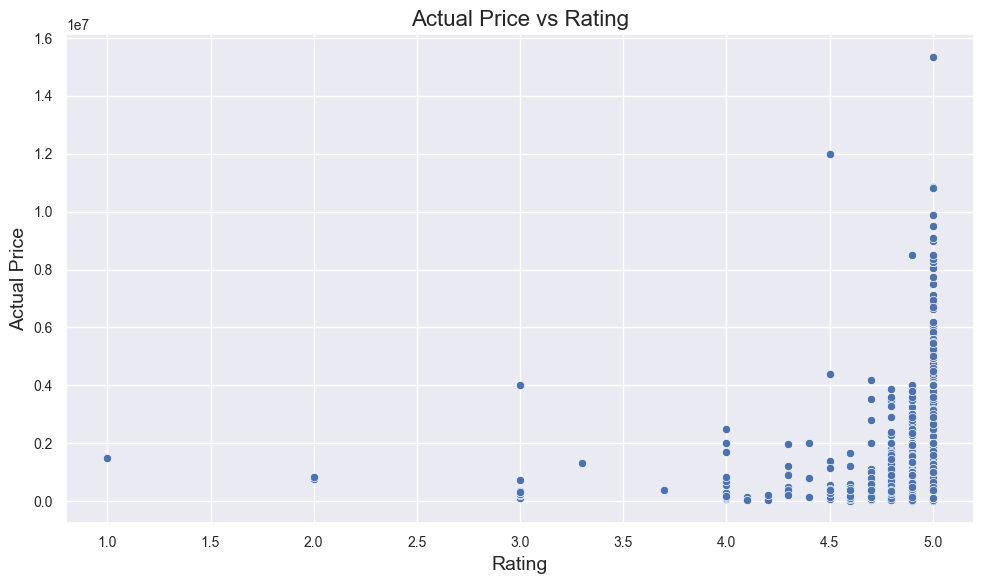

In [219]:
# Filter the data
filtered_df = df_product[(df_product['rating'] >= 0) & (df_product['rating_counter'] != 0)]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='rating', y='harga_awal')
plt.title('Actual Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Actual Price')
plt.tight_layout()
plt.show()

In [220]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_produk       2613 non-null   object 
 1   nama_produk     2613 non-null   object 
 2   jumlah_terjual  2613 non-null   int64  
 3   harga_jual      2613 non-null   int64  
 4   harga_awal      2613 non-null   int64  
 5   diskon          2613 non-null   float64
 6   deskripsi       2613 non-null   object 
 7   rating          2613 non-null   float64
 8   rating_counter  2613 non-null   int64  
 9   link            2613 non-null   object 
 10  image_path      2613 non-null   object 
 11  kategori_1      2613 non-null   object 
 12  kategori_2      2613 non-null   object 
 13  kategori_3      2613 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 285.9+ KB


In [221]:
import plotly.express as px

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(df_product, x='harga_awal', y='harga_jual', z='rating', color='rating',
                     hover_data=['nama_produk'], title='Interactive 3D Scatter Plot of Rating, Actual Price, and Discounted Price')
fig.show()

# Collaborative Filtering

In [222]:
df_review.head()

,id_produk,nama_produk,id_user,nama_akun,rating_user,ulasan_produk,waktu_review,varian_produk
0,PI2563,Pulsar X2 MINI RandomFrankP Edition WIreless G...,UI0001,Bimo,5,Nyaman dan praktis tinggal plug and play,Lebih dari 1 tahun lalu,none
1,PI2564,Melgeek Mojo68 Retro - Mechanical Keyboard,UI0002,S***m,5,"Keren memang mojo68 retro, sayang typing sound...",9 bulan lalu,Varian: Gat Silver Pro
2,PI2567,Redragon K608 Full size Mechanical - Gaming Ke...,UI0003,Riski,5,"buat yg nyari suara pas ngetik, bisa beli yg s...",Lebih dari 1 tahun lalu,Varian: Brown Switch
3,PI2569,CORSAIR MM300 EXTENDED GAMING MOUSEPAD SPEED,UI0004,S***o,5,"rapih, material bagus, nyaman digunakan, dimen...",Lebih dari 1 tahun lalu,none
4,PI2573,ZOOM75 Essential Edition Strawberry IceCream B...,UI0005,Winardi,5,Kedua kali beli Zoom75 disini and never dissap...,3 bulan lalu,none


In [223]:
df_cf = df_review[['nama_produk', 'rating_user', 'id_user']]

df_cf.head()

,nama_produk,rating_user,id_user
0,Pulsar X2 MINI RandomFrankP Edition WIreless G...,5,UI0001
1,Melgeek Mojo68 Retro - Mechanical Keyboard,5,UI0002
2,Redragon K608 Full size Mechanical - Gaming Ke...,5,UI0003
3,CORSAIR MM300 EXTENDED GAMING MOUSEPAD SPEED,5,UI0004
4,ZOOM75 Essential Edition Strawberry IceCream B...,5,UI0005


In [224]:
df_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10809 entries, 0 to 10808
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nama_produk  10809 non-null  object
 1   rating_user  10809 non-null  int64 
 2   id_user      10809 non-null  object
dtypes: int64(1), object(2)
memory usage: 253.5+ KB


In [225]:
print("Null value setelah proses final pre-processing :")
df_cf.isna().sum().to_frame().T

Null value setelah proses final pre-processing :


,nama_produk,rating_user,id_user
0,0,0,0


In [226]:
selected_users = df_cf["id_user"].value_counts()
data = df_cf[df_cf["id_user"].isin(selected_users[selected_users >= 3].index)]

In [227]:
data_pivot = data.pivot_table(index="nama_produk",columns="id_user",values="rating_user").fillna(0)
data_pivot.head()

id_user,UI0001,UI0004,UI0005,UI0006,UI0007,UI0008,UI0009,UI0010,UI0011,UI0012,...,UI2994,UI3008,UI3079,UI3111,UI3213,UI3273,UI3325,UI3395,UI3406,UI3445
nama_produk,,,,,,,,,,,,,,,,,,,,,
1STPLAYER BD1 HQ LEATHER Arm&footrest - LUMBAR MASSAGE - GAMING CHAIR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1STPLAYER FIREBASE M6 Honeycomb & RGB Effect - 10000dpi - Gaming Mouse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1STPLAYER GAMING CHAIR - MODEL FK3 (BLACK GRAY) - KURSI GAMING,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1STPLAYER GAMING CHAIR P01 / P-01 Black White Kursi Gaming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1STPLAYER GAMING CHAIR S01 / S-01 Black Blue Kursi Gaming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Content Based Filtering

In [228]:
import numpy as np
import pandas as pd
import math
import pyfiglet
import json
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
# from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
pd.options.mode.chained_assignment = None

In [229]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

query_no = np.random.choice(data_pivot.shape[0])
print(f"Mencari rekomendasi untuk produk no {query_no} yaitu {data_pivot.index[query_no]}.")
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 6)

Mencari rekomendasi untuk produk no 297 yaitu HOTLINE GAMES MASTER 4.0 AND HOTLINE GAMES GLIDES 3.0 - 3.0 Deathadder.


In [230]:
no = []
name = []
distance = []
rating = []

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Rekomendasi untuk pembeli produk {data_pivot.index[query_no]} :\n")
    else:  
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        
        # Get the ratings for the product
        product_ratings = df_cf[df_cf["nama_produk"] == data_pivot.index[indices.flatten()[i]]]["rating_user"].values
        
        # Check if there are ratings and append accordingly
        if len(product_ratings) > 0:
            rating.append(product_ratings[0])  # Append the first rating found
        else:
            rating.append(None)  # Append None if no ratings are found

dic = {"No": no, "Produk Name": name, "Rating": rating}
recommendation = pd.DataFrame(data=dic)
recommendation.set_index("No", inplace=True)
recommendation


Rekomendasi untuk pembeli produk HOTLINE GAMES MASTER 4.0 AND HOTLINE GAMES GLIDES 3.0 - 3.0 Deathadder :



,Produk Name,Rating
No,,
1,Yiqi Keycaps Minimalist White Japanese PBT Dye...,5
2,IDOBAO PLUGS AND UNPLUGGS DATA LINES TAK COILE...,5
3,Akko OSA Keycap Set Herb Garden - Keycaps,5
4,1STPLAYER GAMING CHAIR S01 / S-01 Black Red Ku...,5
5,NYK Cable 8K Display Port to Display Port - Ca...,5


In [231]:
df_review

,id_produk,nama_produk,id_user,nama_akun,rating_user,ulasan_produk,waktu_review,varian_produk
0,PI2563,Pulsar X2 MINI RandomFrankP Edition WIreless G...,UI0001,Bimo,5,Nyaman dan praktis tinggal plug and play,Lebih dari 1 tahun lalu,none
1,PI2564,Melgeek Mojo68 Retro - Mechanical Keyboard,UI0002,S***m,5,"Keren memang mojo68 retro, sayang typing sound...",9 bulan lalu,Varian: Gat Silver Pro
2,PI2567,Redragon K608 Full size Mechanical - Gaming Ke...,UI0003,Riski,5,"buat yg nyari suara pas ngetik, bisa beli yg s...",Lebih dari 1 tahun lalu,Varian: Brown Switch
3,PI2569,CORSAIR MM300 EXTENDED GAMING MOUSEPAD SPEED,UI0004,S***o,5,"rapih, material bagus, nyaman digunakan, dimen...",Lebih dari 1 tahun lalu,none
4,PI2573,ZOOM75 Essential Edition Strawberry IceCream B...,UI0005,Winardi,5,Kedua kali beli Zoom75 disini and never dissap...,3 bulan lalu,none
...,...,...,...,...,...,...,...,...
10804,PI0009,Fantech OCA258 / OC-A258 Kursi Kerja Kantor Pr...,UI0073,I***n,5,"pengiriman cepat, produk sesuai, kokoh, dan......",Lebih dari 1 tahun lalu,Varian: Hijau
10805,PI0009,Fantech OCA258 / OC-A258 Kursi Kerja Kantor Pr...,UI3861,Johansen,5,bahan dan material bagus. cuma pengiriman aja ...,Lebih dari 1 tahun lalu,Varian: Hitam
10806,PI0009,Fantech OCA258 / OC-A258 Kursi Kerja Kantor Pr...,UI1273,H***y,5,"Barang sesuai deskripsi, pengiriman lumayan ce...",Lebih dari 1 tahun lalu,Varian: Hitam
10807,PI0009,Fantech OCA258 / OC-A258 Kursi Kerja Kantor Pr...,UI0896,Aria,5,"Kualitas terbaik, perakitan mudah, pengiriman ...",Lebih dari 1 tahun lalu,Varian: Putih


In [232]:
df_product

,id_produk,nama_produk,jumlah_terjual,harga_jual,harga_awal,diskon,deskripsi,rating,rating_counter,link,image_path,kategori_1,kategori_2,kategori_3
0,PI0001,"AKKO CS SWITCH MECHANICAL KEYBOARD - ROSE RED,...",7000,3599,4600,0.22,JAM OPERASIONAL\r\nSenin - Minggu : 10:00 - 19...,5.0,166,https://www.tokopedia.com/goodgamingshop/akko-...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Game Capture Card & Stream Deck
1,PI0002,"Zaku Switch Linear 63,5g PCB Mount - Keyboard ...",7000,7999,10499,0.24,JAM OPERASIONAL\r\nSenin - Minggu : 10:00 - 19...,4.9,92,https://www.tokopedia.com/goodgamingshop/zaku-...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Game Capture Card & Stream Deck
2,PI0003,GATERON SWITCH - PLATE MOUNT - Cokelat,4000,3500,3500,0.00,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,111,https://www.tokopedia.com/goodgamingshop/gater...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris Komputer & Laptop,Keyboard
3,PI0004,GATERON Optical MX Switch for Mechanical Gamin...,3000,3500,3500,0.00,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,89,https://www.tokopedia.com/goodgamingshop/gater...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris Komputer & Laptop,Keypad
4,PI0005,Ekstra Packaging Bubble Wrap,3000,3100,3100,0.00,Deskripsi Ekstra Packaging Bubble Wrap\r\nHai ...,4.9,0,https://www.tokopedia.com/goodgamingshop/ekstr...,final-project\data-collection-preprocessing\da...,Perlengkapan Pesta,Bungkus Kemasan,Bubble Wrap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,PI2609,Corsair M65 Pro RGB White Mouse,1,959000,959000,0.00,Deskripsi Corsair M65 Pro RGB White Mouse\r\nT...,0.0,0,https://www.tokopedia.com/goodgamingshop/corsa...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming
2609,PI2610,Corsair M65 Pro Black - Gaming Mouse,1,1019000,1019000,0.00,Deskripsi Corsair M65 Pro Black\r\nThe technol...,5.0,1,https://www.tokopedia.com/goodgamingshop/corsa...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming
2610,PI2611,Corsair Dark Core SE - Gaming Mouse,1,1649000,1649000,0.00,Features :\r\n- WIN WITHOUT WIRES\r\n- WIRED P...,0.0,0,https://www.tokopedia.com/goodgamingshop/corsa...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming
2611,PI2612,Logitech G Pro Mechanical Gaming Keyboard,0,1545000,1947000,0.21,Garansi Resmi 2 tahun Logitech Indonesia (kema...,0.0,0,https://www.tokopedia.com/goodgamingshop/logit...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming


In [233]:
# Menggabungkan kedua DataFrame berdasarkan kolom id_produk
df_merged = pd.merge(df_review, df_product, on=['id_produk', 'nama_produk'], how='left')

# Menampilkan hasil
df_merged.head()

,id_produk,nama_produk,id_user,nama_akun,rating_user,ulasan_produk,waktu_review,varian_produk,jumlah_terjual,harga_jual,harga_awal,diskon,deskripsi,rating,rating_counter,link,image_path,kategori_1,kategori_2,kategori_3
0,PI2563,Pulsar X2 MINI RandomFrankP Edition WIreless G...,UI0001,Bimo,5,Nyaman dan praktis tinggal plug and play,Lebih dari 1 tahun lalu,none,3,1699000,1699000,0.00,JAM OPERASIONAL\r\nSenin - Minggu : 10:00 - 19...,5.0,1,https://www.tokopedia.com/goodgamingshop/pulsa...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming
1,PI2564,Melgeek Mojo68 Retro - Mechanical Keyboard,UI0002,S***m,5,"Keren memang mojo68 retro, sayang typing sound...",9 bulan lalu,Varian: Gat Silver Pro,3,2999000,2999000,0.00,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,1,https://www.tokopedia.com/goodgamingshop/melge...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris Komputer & Laptop,Keyboard
2,PI2567,Redragon K608 Full size Mechanical - Gaming Ke...,UI0003,Riski,5,"buat yg nyari suara pas ngetik, bisa beli yg s...",Lebih dari 1 tahun lalu,Varian: Brown Switch,3,475000,475000,0.00,Garansi Resmi Distributor (WAJIB MENYERTAKAN B...,5.0,1,https://www.tokopedia.com/goodgamingshop/redra...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Game Capture Card & Stream Deck
3,PI2569,CORSAIR MM300 EXTENDED GAMING MOUSEPAD SPEED,UI0004,S***o,5,"rapih, material bagus, nyaman digunakan, dimen...",Lebih dari 1 tahun lalu,none,3,499000,499000,0.00,Superior control for lethal in-game accuracy.\...,5.0,2,https://www.tokopedia.com/goodgamingshop/corsa...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Mouse Pad Gaming
4,PI2573,ZOOM75 Essential Edition Strawberry IceCream B...,UI0005,Winardi,5,Kedua kali beli Zoom75 disini and never dissap...,3 bulan lalu,none,2,3299000,3999000,0.18,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,1,https://www.tokopedia.com/goodgamingshop/zoom7...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming


In [234]:
# Menggabungkan nilai dari kategori_1, kategori_2, dan kategori_3 menjadi satu nilai dalam kolom kategori
df_merged['kategori'] = df_merged.apply(lambda row: ', '.join([row['kategori_1'], row['kategori_2'], row['kategori_3']]), axis=1)

# Menghapus kolom kategori_1, kategori_2, dan kategori_3
df_merged.drop(['kategori_1', 'kategori_2', 'kategori_3'], axis=1, inplace=True)

# Menampilkan hasil
df_merged.head()

,id_produk,nama_produk,id_user,nama_akun,rating_user,ulasan_produk,waktu_review,varian_produk,jumlah_terjual,harga_jual,harga_awal,diskon,deskripsi,rating,rating_counter,link,image_path,kategori
0,PI2563,Pulsar X2 MINI RandomFrankP Edition WIreless G...,UI0001,Bimo,5,Nyaman dan praktis tinggal plug and play,Lebih dari 1 tahun lalu,none,3,1699000,1699000,0.00,JAM OPERASIONAL\r\nSenin - Minggu : 10:00 - 19...,5.0,1,https://www.tokopedia.com/goodgamingshop/pulsa...,final-project\data-collection-preprocessing\da...,"Komputer & Laptop, Aksesoris PC Gaming, Mouse ..."
1,PI2564,Melgeek Mojo68 Retro - Mechanical Keyboard,UI0002,S***m,5,"Keren memang mojo68 retro, sayang typing sound...",9 bulan lalu,Varian: Gat Silver Pro,3,2999000,2999000,0.00,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,1,https://www.tokopedia.com/goodgamingshop/melge...,final-project\data-collection-preprocessing\da...,"Komputer & Laptop, Aksesoris Komputer & Laptop..."
2,PI2567,Redragon K608 Full size Mechanical - Gaming Ke...,UI0003,Riski,5,"buat yg nyari suara pas ngetik, bisa beli yg s...",Lebih dari 1 tahun lalu,Varian: Brown Switch,3,475000,475000,0.00,Garansi Resmi Distributor (WAJIB MENYERTAKAN B...,5.0,1,https://www.tokopedia.com/goodgamingshop/redra...,final-project\data-collection-preprocessing\da...,"Komputer & Laptop, Aksesoris PC Gaming, Game C..."
3,PI2569,CORSAIR MM300 EXTENDED GAMING MOUSEPAD SPEED,UI0004,S***o,5,"rapih, material bagus, nyaman digunakan, dimen...",Lebih dari 1 tahun lalu,none,3,499000,499000,0.00,Superior control for lethal in-game accuracy.\...,5.0,2,https://www.tokopedia.com/goodgamingshop/corsa...,final-project\data-collection-preprocessing\da...,"Komputer & Laptop, Aksesoris PC Gaming, Mouse ..."
4,PI2573,ZOOM75 Essential Edition Strawberry IceCream B...,UI0005,Winardi,5,Kedua kali beli Zoom75 disini and never dissap...,3 bulan lalu,none,2,3299000,3999000,0.18,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,1,https://www.tokopedia.com/goodgamingshop/zoom7...,final-project\data-collection-preprocessing\da...,"Komputer & Laptop, Aksesoris PC Gaming, Keyboa..."


In [235]:
df_merged.to_csv('../data-collection-preprocessing/final_product_ulasan-goodgamingshop.csv', index=False)

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = pd.read_csv('../data-collection-preprocessing/final_product_ulasan-goodgamingshop.csv')
rec_data.drop_duplicates(subset ="nama_produk", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["kategori"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)

In [237]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

rec_indices = pd.Series(rec_data.index, index = rec_data["nama_produk"]).drop_duplicates()


def give_recommendation(title, sig = sig):
    
    idx = rec_indices[title]

    sig_score = list(enumerate(sig[idx]))
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    product_indices = [i[0] for i in sig_score]
     
    rec_dic = {"No" : range(1,11), 
               "Nama Produk" : df_merged["nama_produk"].iloc[product_indices].values,
               "Rating" : df_merged["rating_user"].iloc[product_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Rekomendasi untuk Pembeli {title} :\n")
    
    return dataframe

In [238]:
df_merged

,id_produk,nama_produk,id_user,nama_akun,rating_user,ulasan_produk,waktu_review,varian_produk,jumlah_terjual,harga_jual,harga_awal,diskon,deskripsi,rating,rating_counter,link,image_path,kategori
0,PI2563,Pulsar X2 MINI RandomFrankP Edition WIreless G...,UI0001,Bimo,5,Nyaman dan praktis tinggal plug and play,Lebih dari 1 tahun lalu,none,3,1699000,1699000,0.00,JAM OPERASIONAL\r\nSenin - Minggu : 10:00 - 19...,5.0,1,https://www.tokopedia.com/goodgamingshop/pulsa...,final-project\data-collection-preprocessing\da...,"Komputer & Laptop, Aksesoris PC Gaming, Mouse ..."
1,PI2564,Melgeek Mojo68 Retro - Mechanical Keyboard,UI0002,S***m,5,"Keren memang mojo68 retro, sayang typing sound...",9 bulan lalu,Varian: Gat Silver Pro,3,2999000,2999000,0.00,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,1,https://www.tokopedia.com/goodgamingshop/melge...,final-project\data-collection-preprocessing\da...,"Komputer & Laptop, Aksesoris Komputer & Laptop..."
2,PI2567,Redragon K608 Full size Mechanical - Gaming Ke...,UI0003,Riski,5,"buat yg nyari suara pas ngetik, bisa beli yg s...",Lebih dari 1 tahun lalu,Varian: Brown Switch,3,475000,475000,0.00,Garansi Resmi Distributor (WAJIB MENYERTAKAN B...,5.0,1,https://www.tokopedia.com/goodgamingshop/redra...,final-project\data-collection-preprocessing\da...,"Komputer & Laptop, Aksesoris PC Gaming, Game C..."
3,PI2569,CORSAIR MM300 EXTENDED GAMING MOUSEPAD SPEED,UI0004,S***o,5,"rapih, material bagus, nyaman digunakan, dimen...",Lebih dari 1 tahun lalu,none,3,499000,499000,0.00,Superior control for lethal in-game accuracy.\...,5.0,2,https://www.tokopedia.com/goodgamingshop/corsa...,final-project\data-collection-preprocessing\da...,"Komputer & Laptop, Aksesoris PC Gaming, Mouse ..."
4,PI2573,ZOOM75 Essential Edition Strawberry IceCream B...,UI0005,Winardi,5,Kedua kali beli Zoom75 disini and never dissap...,3 bulan lalu,none,2,3299000,3999000,0.18,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,1,https://www.tokopedia.com/goodgamingshop/zoom7...,final-project\data-collection-preprocessing\da...,"Komputer & Laptop, Aksesoris PC Gaming, Keyboa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,PI0009,Fantech OCA258 / OC-A258 Kursi Kerja Kantor Pr...,UI0073,I***n,5,"pengiriman cepat, produk sesuai, kokoh, dan......",Lebih dari 1 tahun lalu,Varian: Hijau,1000,957000,1299000,0.26,*JIKA INGIN MENGGUNAKAN PENGIRIMAN GOJEK HARAP...,4.9,778,https://www.tokopedia.com/goodgamingshop/fante...,final-project\data-collection-preprocessing\da...,"Rumah Tangga, Furniture, Kursi Kantor"
10805,PI0009,Fantech OCA258 / OC-A258 Kursi Kerja Kantor Pr...,UI3861,Johansen,5,bahan dan material bagus. cuma pengiriman aja ...,Lebih dari 1 tahun lalu,Varian: Hitam,1000,957000,1299000,0.26,*JIKA INGIN MENGGUNAKAN PENGIRIMAN GOJEK HARAP...,4.9,778,https://www.tokopedia.com/goodgamingshop/fante...,final-project\data-collection-preprocessing\da...,"Rumah Tangga, Furniture, Kursi Kantor"
10806,PI0009,Fantech OCA258 / OC-A258 Kursi Kerja Kantor Pr...,UI1273,H***y,5,"Barang sesuai deskripsi, pengiriman lumayan ce...",Lebih dari 1 tahun lalu,Varian: Hitam,1000,957000,1299000,0.26,*JIKA INGIN MENGGUNAKAN PENGIRIMAN GOJEK HARAP...,4.9,778,https://www.tokopedia.com/goodgamingshop/fante...,final-project\data-collection-preprocessing\da...,"Rumah Tangga, Furniture, Kursi Kantor"
10807,PI0009,Fantech OCA258 / OC-A258 Kursi Kerja Kantor Pr...,UI0896,Aria,5,"Kualitas terbaik, perakitan mudah, pengiriman ...",Lebih dari 1 tahun lalu,Varian: Putih,1000,957000,1299000,0.26,*JIKA INGIN MENGGUNAKAN PENGIRIMAN GOJEK HARAP...,4.9,778,https://www.tokopedia.com/goodgamingshop/fante...,final-project\data-collection-preprocessing\da...,"Rumah Tangga, Furniture, Kursi Kantor"


In [239]:
recommendation = give_recommendation("Melgeek Mojo68 Retro - Mechanical Keyboard")
recommendation

Rekomendasi untuk Pembeli Melgeek Mojo68 Retro - Mechanical Keyboard :



,Nama Produk,Rating
No,,
1,Yiqi Keycaps Plastics PBT Dye-Sub MDA Profile,5
2,Corsair MM300 - Gaming Mousepad,5
3,Logitech G733 Lightspeed - Wireless Gaming Hea...,4
4,Logitech G733 Lightspeed - Wireless Gaming Hea...,5
5,Logitech G733 Lightspeed - Wireless Gaming Hea...,4
6,Logitech G733 Lightspeed - Wireless Gaming Hea...,5
7,Logitech G733 Lightspeed - Wireless Gaming Hea...,5
8,Rexus Mousepad Daxa Jacquard - MJ01,4
9,Rexus Mousepad Daxa Jacquard - MJ01,5


# User Based Filtering

In [240]:
df_merged.columns

Index(['id_produk', 'nama_produk', 'id_user', 'nama_akun', 'rating_user',
       'ulasan_produk', 'waktu_review', 'varian_produk', 'jumlah_terjual',
       'harga_jual', 'harga_awal', 'diskon', 'deskripsi', 'rating',
       'rating_counter', 'link', 'image_path', 'kategori'],
      dtype='object')